In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('dataset.csv')

### 1.	Получите DataFrame из исходных данных и отфильтруйте ошибки, если они есть

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_date  727 non-null    object
 1   ip          727 non-null    object
 2   email       727 non-null    object
dtypes: object(3)
memory usage: 17.2+ KB


In [4]:
# Замена значения 2020-11-31 23:54:44 на 2020-12-1 23:54:44 так как в ноябре 2020 30 дней

df.loc[df['event_date'] == '2020-11-31 23:54:44', 'event_date'] = '2020-12-1 23:54:44'

In [5]:
##### замена типа данных в столбце event_date на datetime64 для обработки дат

df['event_date'] = df['event_date'].astype('datetime64') 

### 2.	Получите DataFrame содержащий все уникальные email адреса

In [6]:
unique_emails = df['email'].value_counts()
unique_emails[:10]

ykhofekhac@local134.org         34
unafyg@charter.com              16
luhamubyr@ckcins.com            16
lonolezh@students.rowan.edu     15
ofomepycha@signatureconc.com    15
umonezhopu@cjuhsd.net           13
ikynyv@gmi.com                  13
upezhif@yahoo.com               13
opazumudo@sompaving.com         11
axyxili@nafi.com                11
Name: email, dtype: int64

### 3.	Округлите столбец event_date до часа

In [7]:
df.timestamp = pd.to_datetime(df['event_date'])


df.timestamp.dt.round('H').head()

0   2020-11-29 00:00:00
1   2020-11-30 00:00:00
2   2020-11-30 13:00:00
3   2020-11-30 09:00:00
4   2020-11-29 08:00:00
Name: event_date, dtype: datetime64[ns]

### 4.	Сгруппируйте данные по дням и получите отдельный DataFrame сколько всего было переходов по дням и со скольки уникальных адресов были эти переходы

In [8]:
df.groupby([df.timestamp.dt.round('D')], as_index=True).agg(ip_count=pd.NamedAgg(column='ip', aggfunc='count'),
                                                            ip_unique=pd.NamedAgg(column='ip', aggfunc='nunique')
                                                            )

,ip_count,ip_unique
event_date,,
2020-11-29,207,125
2020-11-30,362,221
2020-12-01,157,97
2020-12-02,1,1


### 5.	Проверьте, есть ли дубликаты в данных и, если есть, выведите их

In [9]:
df[df.duplicated(keep=False)].tail()

,event_date,ip,email
690,2020-11-29 01:53:59,174.193.134.75,izagevum@contractor.net
712,2020-11-29 22:10:24,40.94.33.17,ykhofekhac@local134.org
714,2020-11-29 22:10:24,40.94.33.8,ykhofekhac@local134.org
718,2020-11-29 05:58:58,68.205.86.12,uzyzhone@yahoo.com
720,2020-11-29 20:00:43,40.94.36.64,ykhofekhac@local134.org


### 6.	Получите в отдельный столбец название домена из email адреса и получите все переходы с домена yahoo.com

In [10]:
df['domens']= df['email'].str.extract('@([\w.]+)')

In [11]:
df['domens'].value_counts().head()

yahoo.com       324
aol.com          66
comcast.net      45
csu.edu          34
local134.org     34
Name: domens, dtype: int64

In [12]:
df.loc[df['domens'] == 'yahoo.com','domens'].count()

324

### 7. Отфильтруйте данные по вхождению IP адреса в сеть 209.222.82.0/24

In [13]:
df['209.222.82_group'] = df['ip'].str.extract('(209\.222\.82\.[0-9]{1,4})')
df.sort_values(by='209.222.82_group').head(10)

,event_date,ip,email,domens,209.222.82_group
0,2020-11-29 00:13:36,209.222.82.228,chiryxe@guyroofing.com,guyroofing.com,209.222.82.228
234,2020-11-30 04:39:56,209.222.82.228,lygopiz@csu.edu,csu.edu,209.222.82.228
267,2020-11-29 07:44:31,209.222.82.228,emysebefu@rrsi.org,rrsi.org,209.222.82.228
184,2020-11-29 00:00:35,209.222.82.228,zhypowy@leonschools.net,leonschools.net,209.222.82.228
281,2020-11-30 13:16:44,209.222.82.228,conazhachu@missouridelta.com,missouridelta.com,209.222.82.228
296,2020-11-29 01:43:38,209.222.82.228,emysebefu@rrsi.org,rrsi.org,209.222.82.228
302,2020-11-30 00:26:26,209.222.82.228,ofomepycha@signatureconc.com,signatureconc.com,209.222.82.228
325,2020-11-29 00:00:35,209.222.82.228,zhypowy@leonschools.net,leonschools.net,209.222.82.228
422,2020-11-29 00:00:35,209.222.82.228,zhypowy@leonschools.net,leonschools.net,209.222.82.228
500,2020-11-30 00:05:23,209.222.82.228,ofomepycha@signatureconc.com,signatureconc.com,209.222.82.228


### 8 Попробуйте найти аномалии в данных по которым можно определить, что часть этих переходов исходят не от людей, а от ботов

<AxesSubplot:xlabel='count', ylabel='domens'>

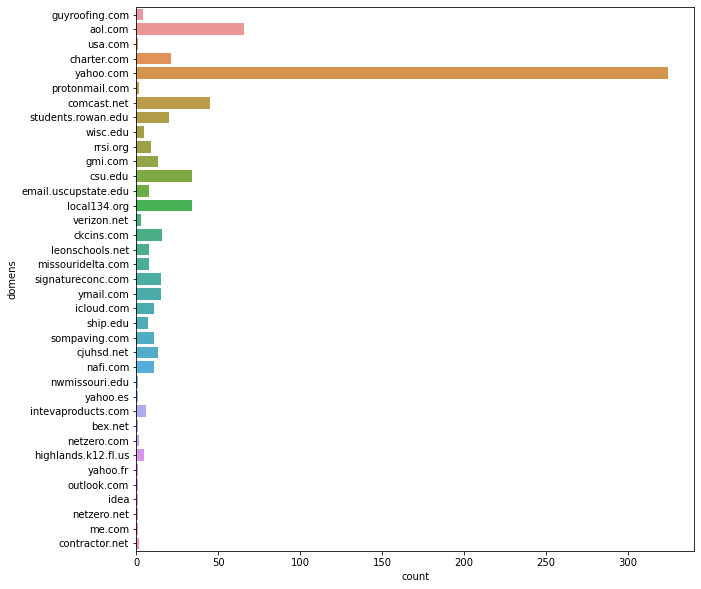

In [14]:
plt.rcParams['figure.figsize']=(10,10)

sns.countplot(y='domens', data=df)

In [15]:
df.groupby([df.timestamp.dt.round('D'),df['domens']] ,as_index=True).agg(
                                                                        ip_unique=pd.NamedAgg(column='ip', aggfunc='nunique'),
                                                                        emai_count=pd.NamedAgg(column='email', aggfunc='count'),
                                                                        emai_unique=pd.NamedAgg(column='email', aggfunc='nunique'),
                                                                        ip_group_count=pd.NamedAgg(column='209.222.82_group', aggfunc='count')
                                                            ).head(28)

ip_unique  emai_count  emai_unique  \
event_date domens                                                     
2020-11-29 aol.com                       9          11            8   
           charter.com                   9          21            2   
           cjuhsd.net                    1           1            1   
           comcast.net                   6          17            6   
           contractor.net                1           2            1   
           csu.edu                       3           6            2   
           email.uscupstate.edu          6           8            1   
           gmi.com                       1           1            1   
           guyroofing.com                1           1            1   
           highlands.k12.fl.us           1           2            1   
           icloud.com                    2           2            2   
           intevaproducts.com            1           1            1   
           leonschools.net               2           4            1   
           nafi.com                      3           3            1   
           protonmail.com                1           1            1   
           rrsi.org                      5           8            1   
           ship.edu                      2           2            1   
           signatureconc.com             2           4            1   
           sompaving.com                 4           4            1   
           students.rowan.edu           10          20            2   
           wisc.edu                      3           5            1   
           yahoo.com                    69          78           67   
           yahoo.es                      1           1            1   
           yahoo.fr                      1           1            1   
           ymail.com                     3           3            3   
2020-11-30 aol.com                      26          32           26   
           cjuhsd.net                    7          12            1   
           ckcins.com                    4           6            1   

                                 ip_group_count  
event_date domens                                
2020-11-29 aol.com                            0  
           charter.com                        0  
           cjuhsd.net                         1  
           comcast.net                        0  
           contractor.net                     0  
           csu.edu                            6  
           email.uscupstate.edu               0  
           gmi.com                            1  
           guyroofing.com                     1  
           highlands.k12.fl.us                2  
           icloud.com                         0  
           intevaproducts.com                 1  
           leonschools.net                    4  
           nafi.com                           3  
           protonmail.com                     0  
           rrsi.org                           8  
           ship.edu                           2  
           signatureconc.com                  4  
           sompaving.com                      4  
           students.rowan.edu                 0  
           wisc.edu                           0  
           yahoo.com                          0  
           yahoo.es                           0  
           yahoo.fr                           0  
           ymail.com                          0  
2020-11-30 aol.com                            0  
           cjuhsd.net                        12  
           ckcins.com                         6

Можно заметить что колличество переходов из почтовых некоторых доменов и ip адресов 209.222.82.***  совпадают это выглядит подозрительным

Так же много переходов где колличество переходов из уникальных почт меньше чем количество уникальных ip адресов что тоже довольно подозрительно  


#### 9. Подумайте, чем можно обогатить этот набор данных,чтобы более качественно провести анализ переходов.
Дополнительно можно самостоятельно дополнить этот набор данных.

Набор данных нужно дополнить данными:

1. Целевым сайтом, сгруппировав данные по целевому сайту можно будет увидеть похожие ip адреса и адреса почт, при подозрении на то что это письмо было открыто ботом, можно будет создать признак в котором будет ставиться значение 0 если не было подозрительной активности и 1 если была замечена подозрительная активность.

2. Если компания закупает почтовый трафик то, необходимо создать признак в котором указывался бы продавец трафика. В случае если компания будет заказывать несколько рассылок можно будет оценить, эффективность рассылок от разных продавцов.

3. Добавить признак где будет считаться количество использований ip адреса, этот признак так же поможет отследить ботов.

4. Так же можно будет добавить признак геолокации где будет указана страна и предположительный город владельца ip адреса. Так можно будет понять географию пользователей и дополнить информацию о ботах. Пример: целевой сайт для рассылки региональный фитнес центр, а большая часть трафика идет например из Великобритании можно сделать вывод о том что рассылка была не эффективна